<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


**ФИО:**

**Твой любимый аник:**

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 24.03.2024

__Жесткий дедлайн:__ 23:59MSK 31.03.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [6]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [8]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [9]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [14]:
df_stocks ['Дата'] = pd.to_datetime(df_stocks['Дата'])
df_stocks.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,2023-12-29,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,2023-12-28,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,2023-12-27,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,2023-12-26,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,2023-12-22,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [13]:
df_rates ['Дата'] = pd.to_datetime(df_rates['Дата'])
df_rates.head()

/var/folders/j4/prfkcymx173c0mj634_p19740000gn/T/ipykernel_59234/3889339048.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_rates ['Дата'] = pd.to_datetime(df_rates['Дата'])


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,2014-01-01,"45,189","32,855","4,237"
1,2014-02-01,"45,254","33,1","4,269"
2,2014-03-01,"45,114","33,2","4,282"
3,2014-04-01,"45,125","33,248","4,288"
4,2014-05-01,"45,228","33,255","4,289"


__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.

Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [15]:
def correct_values(value: str):

    corrected_value = value.replace('.', '')
    corrected_value = value.replace(',', '.')

    if 'B' in value:
        corrected_value = corrected_value.replace('B', '')
    elif 'M' in value:
        corrected_value = corrected_value.replace('M', '')
    elif 'K' in value:
        corrected_value = corrected_value.replace('K', '')
    elif '%' in value:
        corrected_value = corrected_value.replace('%', '')

    corrected_value = float(corrected_value)

    coefficient = 1
    if 'B' in value:
        coefficient = 10**9
    elif 'M' in value:
        coefficient = 10**6
    elif 'K' in value:
        coefficient = 10**3

    corrected_value *= coefficient

    return corrected_value

Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

In [16]:
df_stocks['Цена'] = df_stocks['Цена'].map(correct_values, na_action='ignore')
df_stocks['Откр.'] = df_stocks['Откр.'].map(correct_values, na_action='ignore')
df_stocks['Макс.'] = df_stocks['Макс.'].map(correct_values, na_action='ignore')
df_stocks['Мин.'] = df_stocks['Мин.'].map(correct_values, na_action='ignore')
df_stocks['Объём'] = df_stocks['Объём'].map(correct_values, na_action='ignore')
df_stocks['Изм. %'] = df_stocks['Изм. %'].map(correct_values, na_action='ignore')

df_rates['EUR_RUB'] = df_rates['EUR_RUB'].map(correct_values, na_action='ignore')
df_rates['USD_RUB'] = df_rates['USD_RUB'].map(correct_values, na_action='ignore')
df_rates['HKD_RUB'] = df_rates['HKD_RUB'].map(correct_values, na_action='ignore')

__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [17]:
df_merged = pd.merge(df_stocks, df_rates, on='Дата', how='left')

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,193.15,192.49,193.50,191.09,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,193.60,195.18,195.41,192.97,37150000.0,-0.55,AAPL,101.467,92.00,11.791


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [18]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
}

for ticker, curr_pair in stocks_currency_dict.items():
    mask = df_merged['Тикер'] == ticker
    df_merged.loc[mask, ['Цена', 'Откр.', 'Макс.', 'Мин.']] *= df_merged.loc[mask, curr_pair].values[:, None]

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.8040,17565.9840,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17298.3088,17348.3504,17394.8176,17261.6712,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17628.8005,17568.5623,17660.7450,17440.7843,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17694.9630,17746.2926,17771.9574,17674.7978,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17811.2000,17956.5600,17977.7200,17753.2400,37150000.0,-0.55,AAPL,101.467,92.00,11.791


In [19]:
df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']] = df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']].apply(lambda x: x * df_merged[curr_pair], axis=1)


KeyboardInterrupt: 

Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [21]:
df_merged.dropna(inplace=True)
df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.8040,17565.9840,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17298.3088,17348.3504,17394.8176,17261.6712,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17628.8005,17568.5623,17660.7450,17440.7843,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17694.9630,17746.2926,17771.9574,17674.7978,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17811.2000,17956.5600,17977.7200,17753.2400,37150000.0,-0.55,AAPL,101.467,92.00,11.791


__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [20]:
unique = df_stocks['Тикер'].nunique()
print(unique)

7


__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [22]:
df_merged['Разница'] = df_merged['Макс.'] - df_merged['Мин.']
max_raznica = df_merged.loc[df_merged['Разница'].idxmax()]
print("Акция: ", max_raznica['Тикер'], "; временной период: ", max_raznica['Дата'])

Акция:  MSFT ; временной период:  2023-07-18 00:00:00


__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [23]:
df_merged['Сумма'] = df_merged['Объём'] * df_merged['Цена']
max_summa = df_merged.loc[df_merged['Сумма'].idxmax()]
print("Акция: ", max_summa['Тикер'], "; сумма: ", max_summa['Сумма'])

Акция:  AAPL ; сумма:  3249826226976.0


__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [24]:
df_merged['Изм. %'] = df_merged['Изм. %'].abs()
max_izmenenia = df_merged.groupby('Дата')['Изм. %'].mean()
top_5_diff = max_izmenenia.nlargest(5)
print(top_5_diff)

Дата
2022-02-24    13.081429
2016-02-29    11.840000
2020-03-24    10.795714
2020-12-03    10.615714
2022-02-21     9.128000
Name: Изм. %, dtype: float64


__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [25]:
top_5_diff = top_5_diff.reset_index(name='Изм. %')
print(top_5_diff)

        Дата     Изм. %
0 2022-02-24  13.081429
1 2016-02-29  11.840000
2 2020-03-24  10.795714
3 2020-12-03  10.615714
4 2022-02-21   9.128000


__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [26]:
df = df_merged.pivot_table(index='Дата', columns='Тикер', values='Цена')
print(df)

Тикер              AAPL         BMWG    GAZP        MBGn         MSFT  \
Дата                                                                    
2014-01-04    677.92502   4451.26224  135.89  3371.43600   1451.89526   
2014-01-05    752.44224          NaN     NaN         NaN   1425.08000   
2014-01-07    803.29004   4385.00670  148.97  3251.86081   1438.56946   
2014-01-08    859.02444   4206.24000  131.50  2920.80000   1532.15928   
2014-01-09          NaN   4304.56910  132.32  3026.55080          NaN   
...                 ...          ...     ...         ...          ...   
2023-12-25          NaN          NaN  161.09         NaN          NaN   
2023-12-26  17694.96300          NaN  161.00         NaN  34341.33560   
2023-12-27  17628.80050  10218.61160  159.86  6378.48993  34141.36890   
2023-12-28  17298.30880   9834.98436  159.14  6096.43694  33535.02080   
2023-12-29  17397.01080   9936.50488  159.52  6167.17980  33978.97440   

Тикер          Tencent      VTBR  
Дата           

__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также нистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__

1) Тикер AAPL: Распределение стоимости акций не похоже на нормальное. В течение последних $10$ лет финансовые рынки росли. Кризисов не видно, тенденция явно положительная.

2) Тикер BMWG: Распределение стоимости акций не похоже на нормальное. В течение последних $10$ лет финансовые рынки вели себя по-разному. Кризисы видны (2019-2021; 2022-2023).

3) Тикер GAZP: Распределение стоимости акций напоминает нормальное. С 2019 по 2022 год наблюдалась тенденция роста, но потом по очевидным СВО-причинам стоимость акций значительно упала и в 2023-2024 году держится на уровне 2018-2019 года.

4) Тикер MBGn: Распределение стоимости акций не похоже на нормальное. В течение последних $10$ лет финансовые рынки вели себя по-разному - в 2015-2020 годах наблюдалась отрицательная тенденция; в 2020-2021 был кризис, цены сильно просели; также кризис наблюдался и в 2022-2023 годах.

5) Тикер MSFT: Распределение стоимости акций не похоже на нормальное. С 2014 года наблюдалась тенденция роста, которая замедлилась в 2022 году - акции немного просели, жестких кризисов замечено не было.

6) Тикер VTBR: Если не брать в расчет кризисное для российских компаний время с 2022 года, то распределение напоминает нормальное. Кризисные явления наблюдалась с 2019 по 2021 год (включительно), был период некоего "застоя". В 2022 году все очевидно рухнуло.

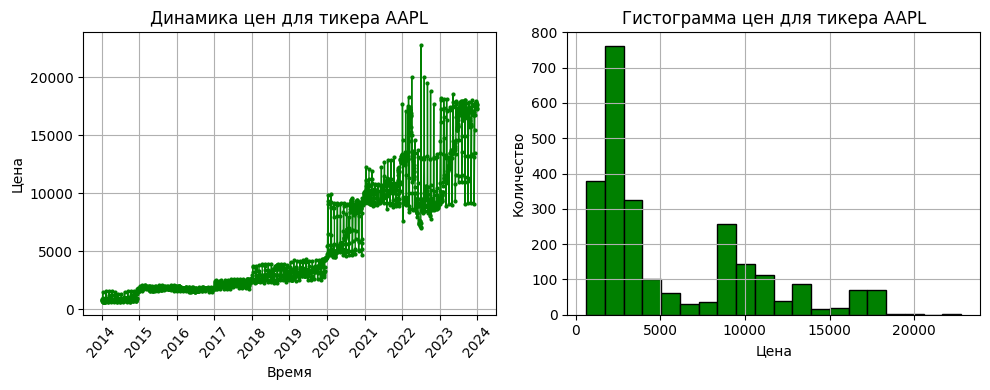

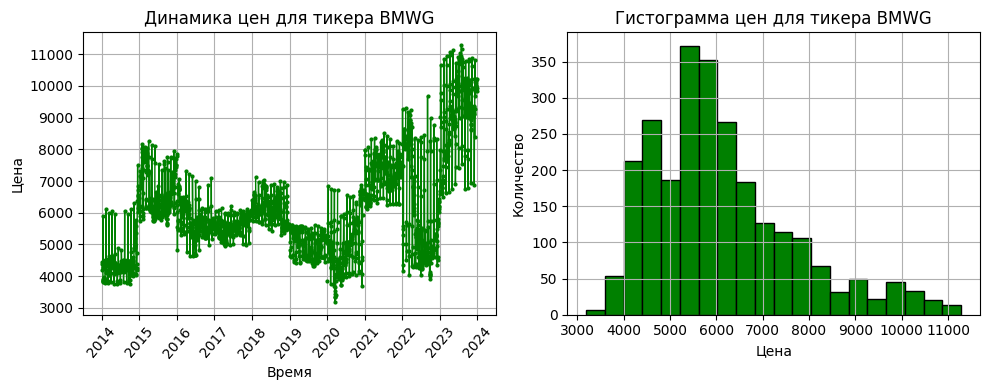

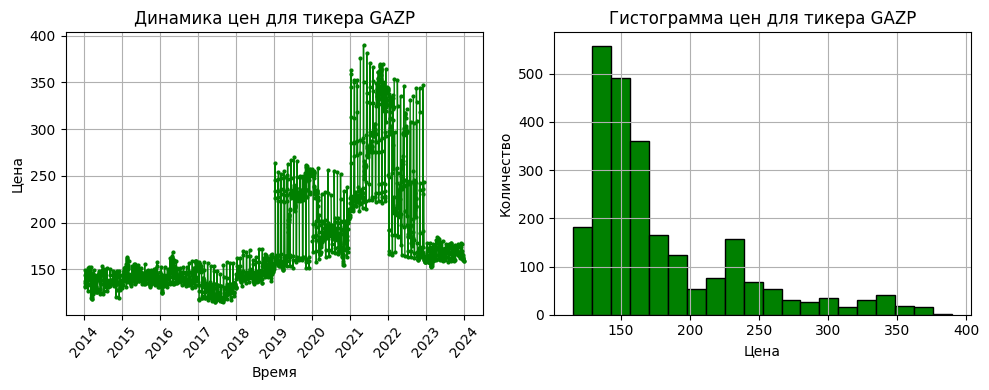

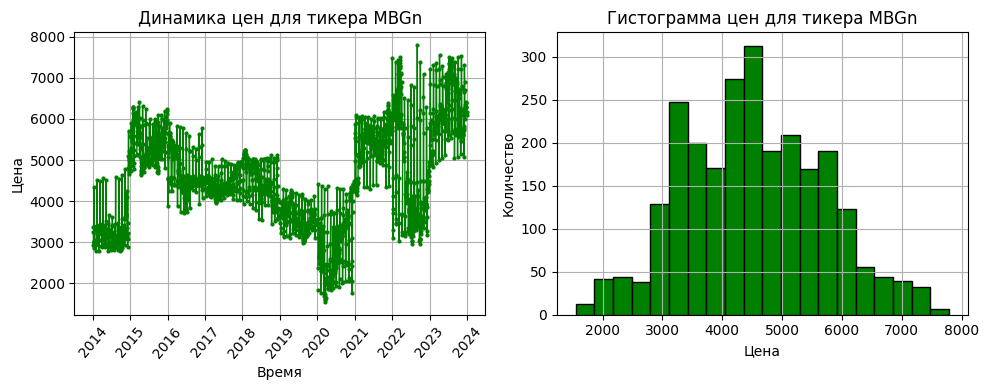

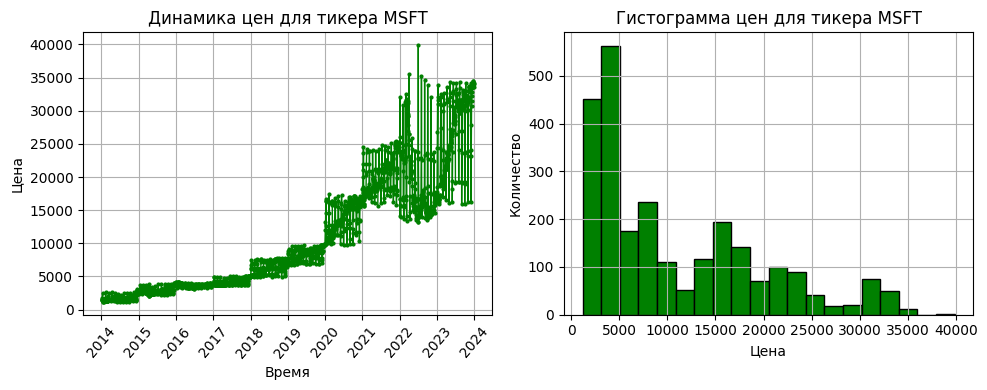

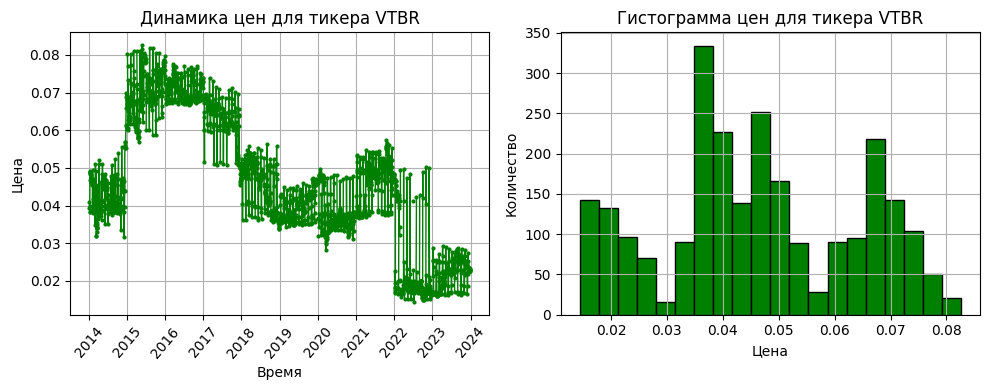

In [99]:
grouped = df.groupby(level=0, axis=1)

for ticker, data in grouped:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(data.index, data.values, color='green', marker='o', linestyle='solid', linewidth=1, markersize=2) #тип линии и точек на динамике цен
    plt.title(f'Динамика цен для тикера {ticker}')
    plt.xlabel('Время')
    plt.ylabel('Цена')
    plt.xticks(rotation=50)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(data.values.flatten(), bins=20, color='green', edgecolor='black')
    plt.title(f'Гистограмма цен для тикера {ticker}')
    plt.xlabel('Цена')
    plt.ylabel('Количество')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [27]:
df_pct_change = df.pct_change()
print(df_pct_change.head())

Тикер           AAPL      BMWG      GAZP      MBGn      MSFT   Tencent  \
Дата                                                                     
2014-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-05  0.109920  0.000000  0.000000  0.000000 -0.018469  0.000000   
2014-01-07  0.067577 -0.014885  0.096254 -0.035467  0.009466  0.000000   
2014-01-08  0.069383 -0.040768 -0.117272 -0.101807  0.065058  0.161685   
2014-01-09  0.000000  0.023377  0.006236  0.036206  0.000000  0.030776   

Тикер           VTBR  
Дата                  
2014-01-04       NaN  
2014-01-05  0.000000  
2014-01-07  0.042132  
2014-01-08 -0.025816  
2014-01-09 -0.042000  


__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

__Ответ:__ 

- Нет, доходности по акциям не имеют нормального распределения.
- Да, видно, что выбросов немало - особенно в тикере VTBR.

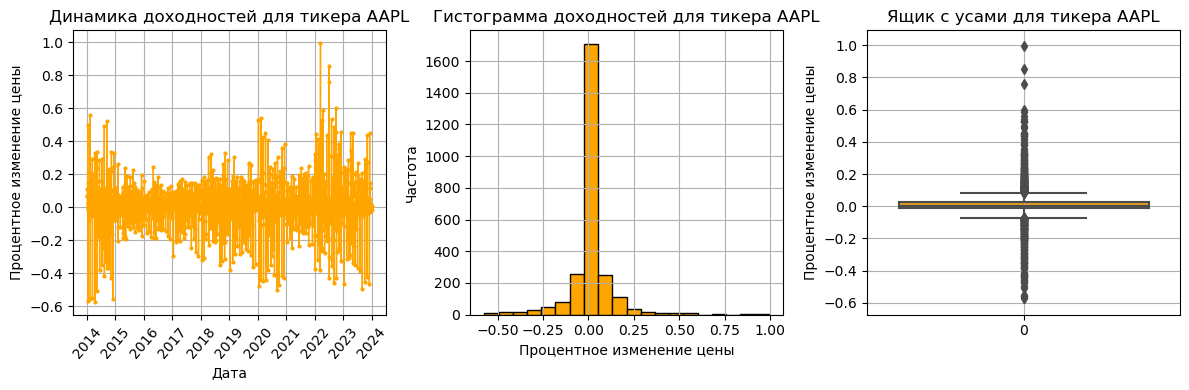

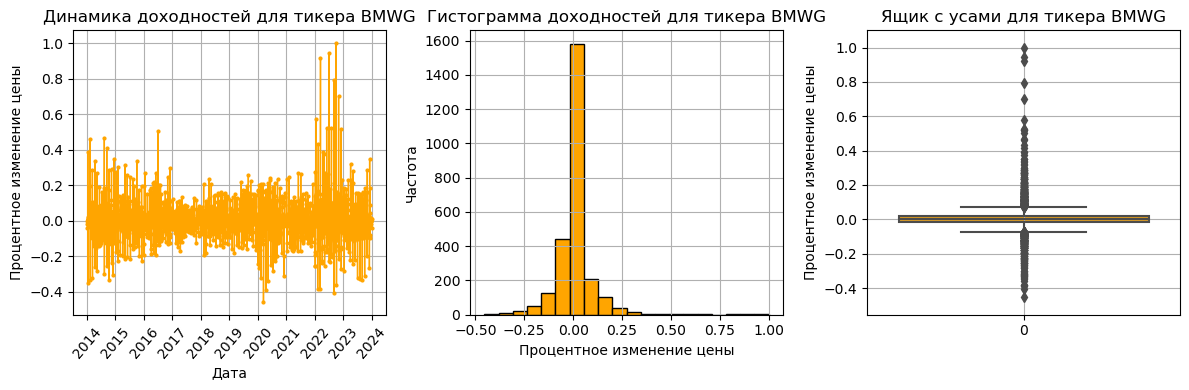

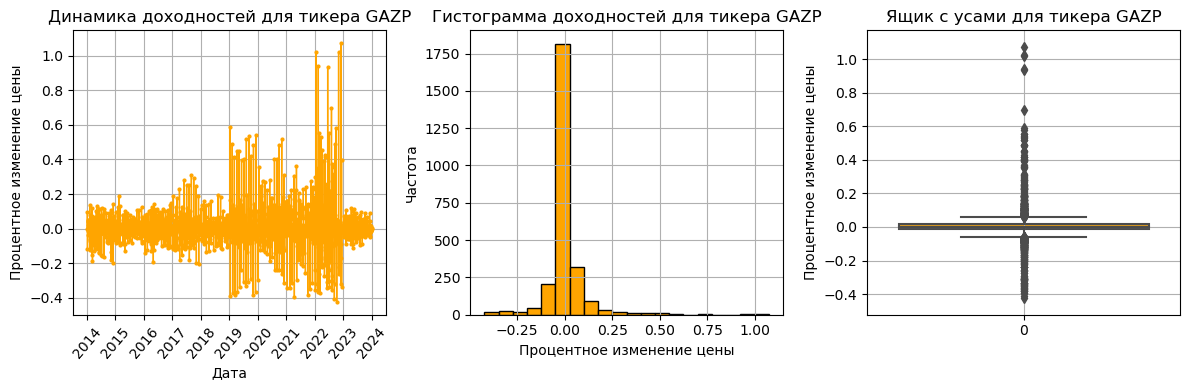

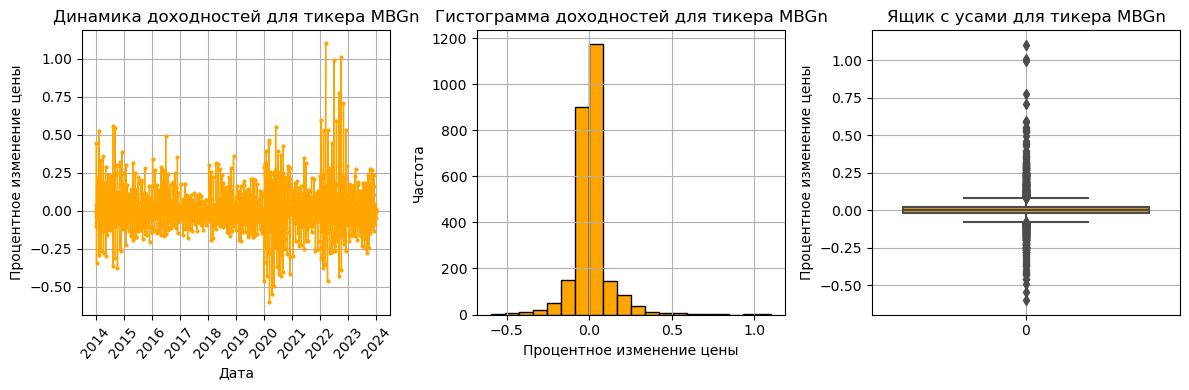

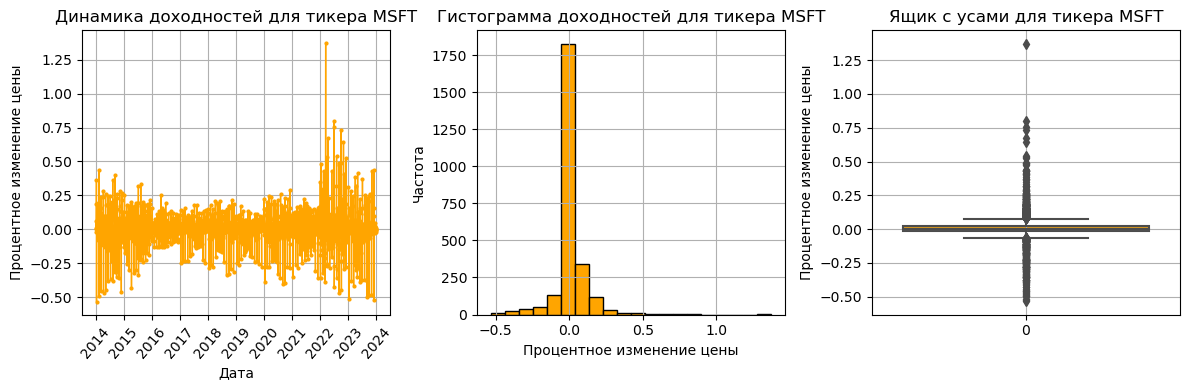

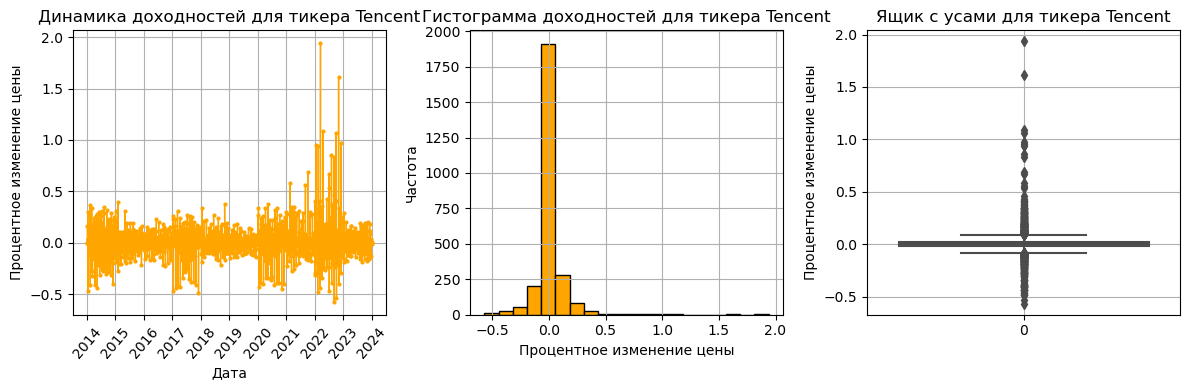

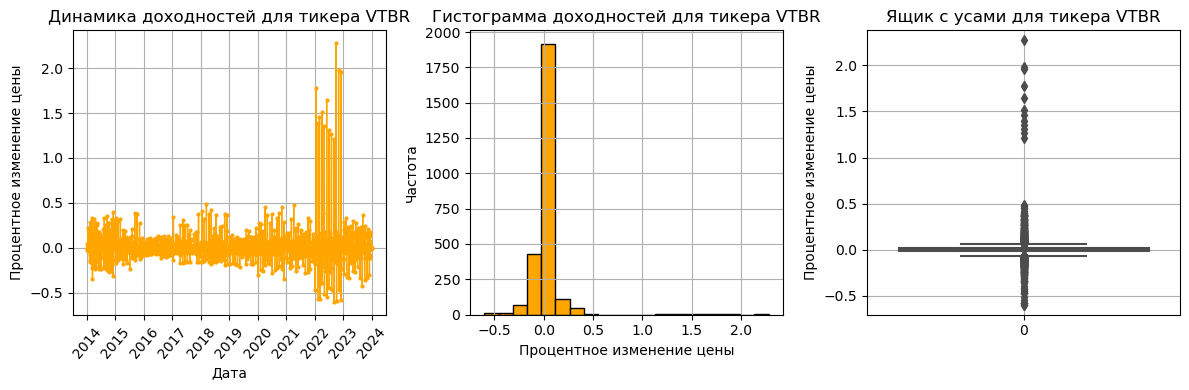

In [48]:
import seaborn as sns #для ящика с усами

for ticker in df_pct_change.columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(df_pct_change.index, df_pct_change[ticker], color='orange', marker='o', linestyle='solid', linewidth=1, markersize=2)
    plt.title(f'Динамика доходностей для тикера {ticker}')
    plt.xlabel('Дата')
    plt.ylabel('Процентное изменение цены')
    plt.xticks(rotation=50)
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.hist(df_pct_change[ticker], bins=20, color='orange', edgecolor='black')
    plt.title(f'Гистограмма доходностей для тикера {ticker}')
    plt.xlabel('Процентное изменение цены')
    plt.ylabel('Частота')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    sns.boxplot(data=df_pct_change[ticker], color='orange')  # plt.boxplot(df_pct_change[ticker]) - ничего не выводит,
                                                             # поэтому пришлось использовать доп библиотеку
    plt.title(f'Ящик с усами для тикера {ticker}')
    plt.ylabel('Процентное изменение цены')
    plt.grid(True)
    plt.ylim(df_pct_change[ticker].min() - 0.1, df_pct_change[ticker].max() + 0.1)

    plt.tight_layout()
    plt.show()

__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [28]:
absolute_change_average = df_pct_change.abs().mean(axis=1)
print(absolute_change_average.head())

Дата
2014-01-04         NaN
2014-01-05    0.018341
2014-01-07    0.037969
2014-01-08    0.083112
2014-01-09    0.019799
dtype: float64


Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

In [29]:
top_5_diff.set_index('Дата', inplace=True)
df_pct_change.index = pd.to_datetime(df_pct_change.index)

selected_df_pct_change = df_pct_change[df_pct_change.index.isin(top_5_diff.index.tolist())]

top_5_diff['Изм. (RUB) %'] = selected_df_pct_change.abs().mean(axis=1)

print(top_5_diff)

               Изм. %  Изм. (RUB) %
Дата                               
2022-02-24  13.081429      0.126778
2016-02-29  11.840000      0.016316
2020-03-24  10.795714      0.097035
2020-12-03  10.615714      0.203611
2022-02-21   9.128000      0.054384


__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__

- Рассмотрим увеличение процентного изменения 2022-02-24; Изм. %: 13.08%; Изм. (RUB) %: 0.13%:
Стоимость акций увеличилась на 13.08% по сравнению с предыдущим периодом. При пересчете по курсу в рубли, стоимость увеличилась на дополнительные 0.13%.
Это может указывать на рост цен на акции и увеличение доходности в рублевом выражении.

- Рассмотрим уменьшение процентного изменения 2020-12-03; Изм. %: 10.62%; Изм. (RUB) %: 0.20%:
Здесь мы видим, что стоимость акций уменьшилась на 10.62% относительно предыдущего периода. Однако, при пересчете в рубли, происходит уменьшение на 0.20%.
Это может быть обусловлено как самим изменением стоимости акций, так и изменением валютного курса.

## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [30]:
w = np.arange(0, 1.01, 0.01)
print(w)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [55]:
r1_d = df_pct_change['AAPL'].mean()
r2_d = df_pct_change['Tencent'].mean()

r1 = ((1 + r1_d) ** 252) - 1
r2 = ((1 + r2_d) ** 252) - 1

print("Средняя годовая доходность для акций 'AAPL':", r1)
print("Средняя годовая доходность для акций 'Tencent':", r2)

Средняя годовая доходность для акций 'AAPL': 6.197113555262046
Средняя годовая доходность для акций 'Tencent': 5.657793414263677


__в) [3 балла]__ Аналогично сохраните стандартные отклонения доходности этих акций в `sd1` и `sd2`. Преобразуйте эти значения из дневных в годовые:

$$
\sigma_{\text{год}} = \sigma_{\text{день}} \times \sqrt{252}
$$

Где:
- $\sigma_{\text{год}}$ - годовая волатильность,
- $\sigma_{\text{день}}$ - ежедневная волатильность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

Эта формула основана на предположении, что ежедневные доходности распределены независимо и одинаково. В реальности рыночные условия могут влиять на точность этого преобразования, но это общепринятый метод для оценки годовой волатильности на основе ежедневных данных.

In [56]:
sd1_d = df_pct_change['AAPL'].std()
sd2_d = df_pct_change['Tencent'].std()

sd1 = sd1_d * np.sqrt(252)
sd2 = sd2_d * np.sqrt(252)

print("Стандартные отклонения доходности акций 'AAPL':", sd1)
print("Стандартные отклонения доходности акций 'Tencent':", sd2)

Стандартные отклонения доходности акций 'AAPL': 1.7797339521890225
Стандартные отклонения доходности акций 'Tencent': 1.960188213458556


__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [57]:
rho = df_pct_change[['AAPL', 'Tencent']].corr().iloc[0, 1]

print("Корреляция между акциями 'AAPL' и 'Tencent':", rho)

Корреляция между акциями 'AAPL' и 'Tencent': 0.5593078697724126


Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [58]:
r_p2 = w * r1 +(1 - w) * r2
sd_p2 = np.sqrt(w**2 * sd1**2 + (1 - w)**2 * sd2**2 + 2 * w * (1 - w) * rho * sd1 * sd2)

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

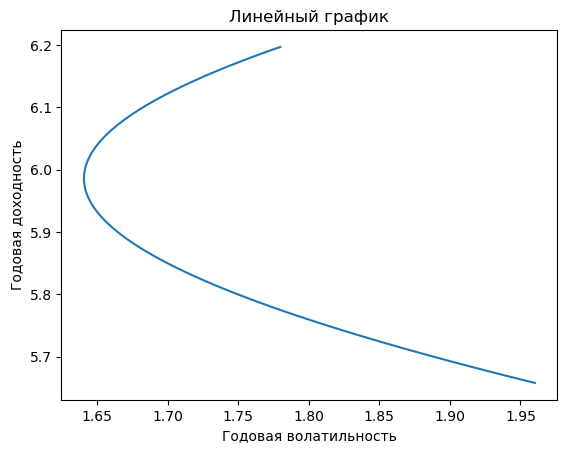

In [59]:
x = sd_p2
y = r_p2
plt.plot(x, y)
plt.title('Линейный график')
plt.xlabel('Годовая волатильность')
plt.ylabel('Годовая доходность')

plt.show()

Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [36]:
df_r = pd.DataFrame({
    'Вес': w,
    'Риск': sd_p2,
    'Доходность': r_p2
})

df_r.head()

,Вес,Риск,Доходность
0,0.00,1.475895,2.001573
1,0.01,1.471967,2.043528
2,0.02,1.468176,2.085484
3,0.03,1.464524,2.127439
4,0.04,1.461011,2.169395


__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [37]:
min_index = df_r['Риск'].idxmin()
min_sd_p = df_r.loc[min_index]
min_sd = min_sd_p['Риск']
print("Минимальный риск:", min_sd)
print("Портфель с минимальным риском:", min_sd_p)

Минимальный риск: 1.4205227099539754
Портфель с минимальным риском: Вес           0.270000
Риск          1.420523
Доходность    3.134369
Name: 27, dtype: float64


__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [38]:
df_eff_p = df_r.loc[(df_r['Доходность'] > min_sd_p['Доходность']) & (df_r['Риск'] > min_sd_p['Риск'])]
print("Множество эффективных портфелей:", df_eff_p)

Множество эффективных портфелей:       Вес      Риск  Доходность
28   0.28  1.420569    3.176324
29   0.29  1.420769    3.218280
30   0.30  1.421121    3.260235
31   0.31  1.421625    3.302191
32   0.32  1.422282    3.344146
..    ...       ...         ...
96   0.96  1.744880    6.029292
97   0.97  1.753473    6.071247
98   0.98  1.762147    6.113203
99   0.99  1.770901    6.155158
100  1.00  1.779734    6.197114

[73 rows x 3 columns]


__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

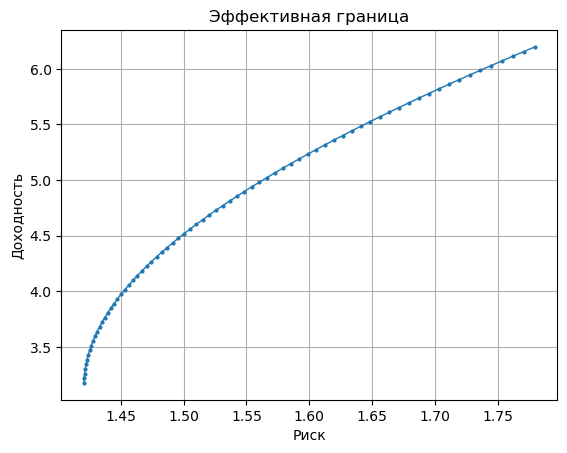

In [39]:
plt.plot(df_eff_p['Риск'], df_eff_p['Доходность'], marker='o', linestyle='solid', linewidth=1, markersize=2)

plt.title('Эффективная граница')
plt.xlabel('Риск')
plt.ylabel('Доходность')

plt.grid(True)
plt.show()

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [41]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [42]:
df_r['Sharp'] = (df_r['Доходность'] - r_f) / df_r['Риск']
print(df_r['Sharp'])

0      1.276224
1      1.308133
2      1.340087
3      1.372077
4      1.404093
         ...   
96     3.387793
97     3.395118
98     3.402215
99     3.409088
100    3.415743
Name: Sharp, Length: 101, dtype: float64


In [129]:
df_r.head()

,Вес,Риск,Доходность,Sharp
0,0.00,1.475895,2.001573,1.276224
1,0.01,1.471967,2.043528,1.308133
2,0.02,1.468176,2.085484,1.340087
3,0.03,1.464524,2.127439,1.372077
4,0.04,1.461011,2.169395,1.404093


__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [60]:
max_sharp_p = df_r.loc[df_r['Sharp'].idxmax()]
max_sharp = max_sharp_p['Sharp']
print(max_sharp)

3.4157428686377016


Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [44]:
sigma = np.array([min_sd, max_sharp_p['Риск']])

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [45]:
r = max_sharp * sigma + r_f

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

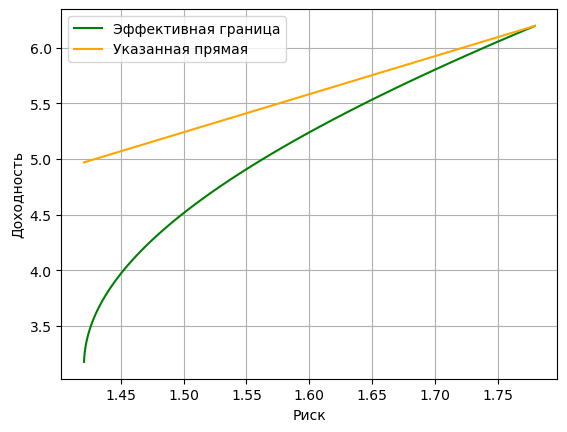

In [46]:
plt.plot(df_eff_p['Риск'], df_eff_p['Доходность'], label='Эффективная граница', color='green')

plt.plot(sigma, r, label='Указанная прямая', color='orange')

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.legend()

plt.grid(True)
plt.show()

Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

**Ответ:**
- Значение коэффициента Шарпа max_sharp = 3.4157 говорит о том, что портфель или инвестиция приносит значительную доходность сверх безрисковой ставки. Чем выше значение коэффициента Шарпа, тем выше доходность по сравнению с уровнем риска.;
- Поскольку коэффициент Шарпа учитывает и волатильность инвестиции, наше значение кэфа указывает на относительно низкий уровень риска в портфеле или инвестиции по сравнению с доходностью;
- Чем выше коэффициент Шарпа, тем более эффективен портфель с точки зрения баланса между риском и доходностью. Так как мы имеем дело с максимальным значением данного коэффициента, значит можно сделать вывод о том, что эффективность данного протфеля довольно высока;
- Высокое значение коэффициента Шарпа указывает на то, что инвестор получает значительную доходность при относительно низком уровне риска, что делает этот портфель привлекательным для инвестирования.

Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.